# Analysis of Slot Distribution in the Rhetorical Structure

In [28]:
import json
import pandas as pd
import matplotlib.pyplot as plt

data_path = "../data/slots_data/rhet_data_slots.json"

In [29]:
rhet_dict = {
    "identification":{},
    "description":{},
    "process":{},
    "smell_taste":{},
    "service_suggestions":{},
    "quality_assurance":{}
}
rhet_list = [k for k,_ in rhet_dict.items()]
with open(data_path, 'r') as f:
    records = json.load(f)
    files = list(records.keys())
    file_0 = files[0]
    ident_keys = records[file_0]['identification']['slots'].keys()
    desc_keys = records[file_0]['description']['slots'].keys()
    proc_keys = records[file_0]['process']['slots'].keys()
    smell_taste_keys = records[file_0]['smell_taste']['slots'].keys()
    service_sugg_keys = records[file_0]['service_suggestions']['slots'].keys()
    qty_assur_keys = records[file_0]['quality_assurance']['slots'].keys()
    
    # innitialize dict keys
    rhet_dict["identification"] = {k.split(" ")[0]:0 for k in ident_keys}
    rhet_dict["description"] = {k.split(" ")[0]:0 for k in desc_keys}
    rhet_dict["process"] = {k.split(" ")[0]:0 for k in proc_keys}
    rhet_dict["smell_taste"] = {k.split(" ")[0]:0 for k in smell_taste_keys}
    rhet_dict["service_suggestions"] = {k.split(" ")[0]:0 for k in service_sugg_keys}
    rhet_dict["quality_assurance"] = {k.split(" ")[0]:0 for k in qty_assur_keys}
    
    error_records = 0
    for file in files:
        record = records[file]
        for rhet in rhet_list:
            slot = record[rhet]['slots']
            for slot_name, slot_value in slot.items():
                # check if slot_vlaue is none or contains value
                slot_name = slot_name.split(" ")[0]
                if slot_name not in rhet_dict[rhet]:
                    error_records+=1
                    continue
                
                if "None" not in slot_value:
                    rhet_dict[rhet][slot_name]+=1

print('Error Records: ', error_records)

Error Records:  178


In [29]:
rhet_dict

{'identification': {'NameOfCheese': 594,
  'QualityOfRind': 591,
  'AnimalSource': 215,
  'MainIngredient': 62,
  'MainIngredientWeight': 4,
  'NameOfCheesery': 507,
  'NamesOfFacilities': 207,
  'ManufacturePlace': 592,
  'ManufacturedSinceDate': 160,
  'CheeseOriginatedDate': 94,
  'CheeseCreatorMovedFromPlace': 109,
  'CheeseCreatorMovedToPlace': 101,
  'CheeseNameFromObject': 157},
 'description': {'CheeseProductFatContent': 231,
  'CheeseProductTexture': 600,
  'CheeseProductTaste': 514,
  'CheeseProductRind': 435,
  'CheeseProductColor': 279,
  'CheeseProductStyle': 476,
  'CheeseProductIsVegetarian': 592,
  'CheeseProductIsOrganic': 524,
  'CheeseProductIsUnpasteurised': 519,
  'CheeseProductIsPregnantOk': 469,
  'CheeseProductGeneralShape': 409,
  'CheeseProductWaxColor': 41,
  'CheeseProductInteriorColor': 99,
  'CheeseProductPrePackShape': 87,
  'CheeseProductPackWeight': 373,
  'CheeseProductSlices': 5,
  'CheeseProductCheeseType': 499,
  'CheeseProductMilkQuality': 439,
  '

# Plot the Distribution of Data

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
def plot_histogram(data):
    # Extract categories and their frequencies from the dictionary
    sns.set_style('darkgrid')
    categories = list(data.keys())
    frequencies = list(data.values())
    
    # Calculate the appropriate figure size based on the number of categories
    fig_width = max(len(categories) * 0.5, 8)  # Adjust as needed
    fig_height = 6

    # Create a larger figure to accommodate the x-axis labels
    plt.figure(figsize=(fig_width, fig_height))
    # Plot a bar plot
    ax = sns.barplot(x=categories, y=frequencies)
    
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.title('Histogram of Categorical Variables')
    # tilt the labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right')
    plt.show()

In [65]:
ident_data = rhet_dict['identification']
desc_data = rhet_dict['description']
proc_data = rhet_dict['process']
smell_taste_data = rhet_dict['smell_taste']
service_data = rhet_dict['service_suggestions']
qty_data = rhet_dict['quality_assurance']

# Indentification

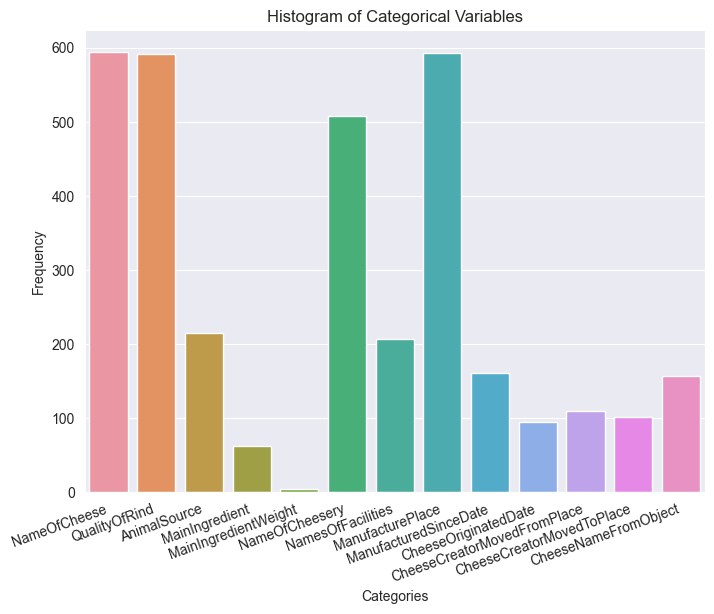

In [66]:
# Plot the histogram using the sample data
plot_histogram(ident_data)

# Description

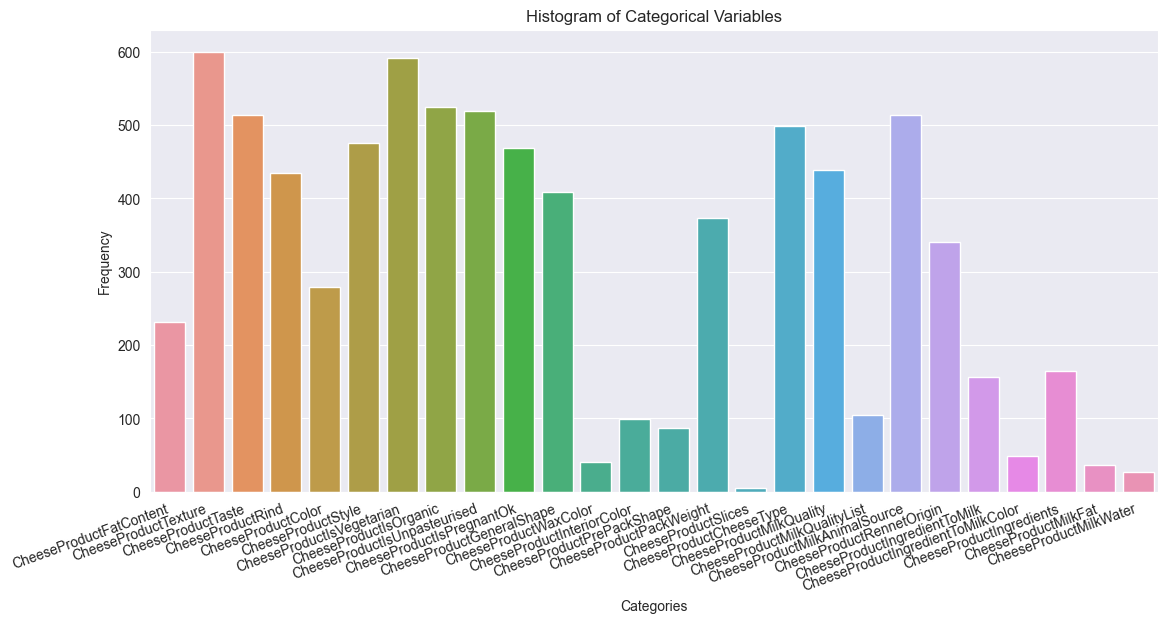

In [67]:
plot_histogram(desc_data)

# Process

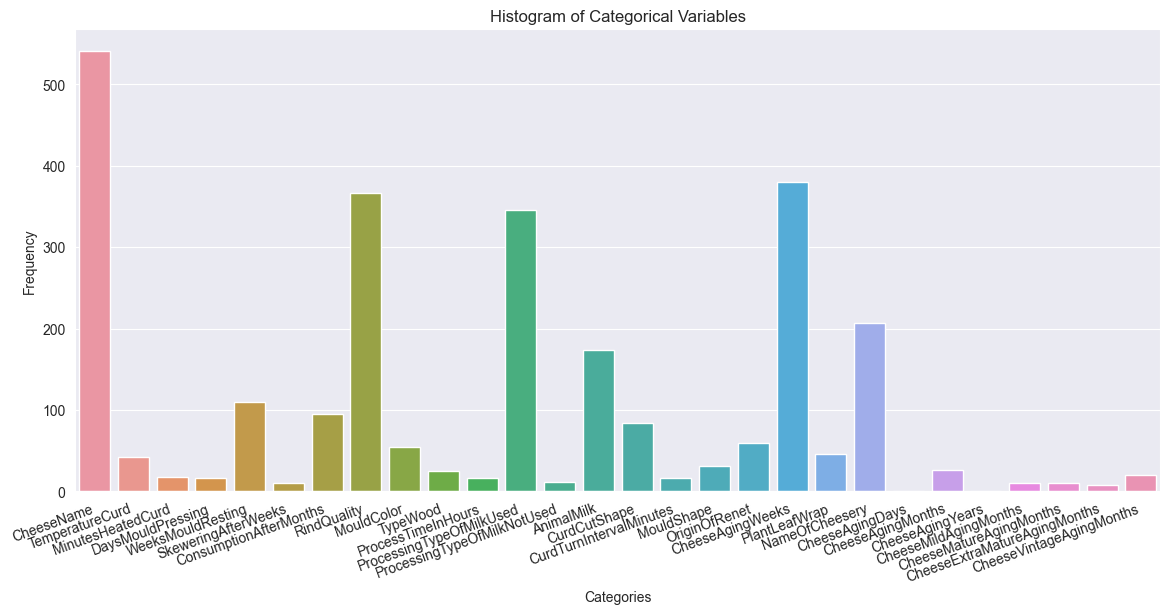

In [68]:
plot_histogram(proc_data)

# Smell & Taste

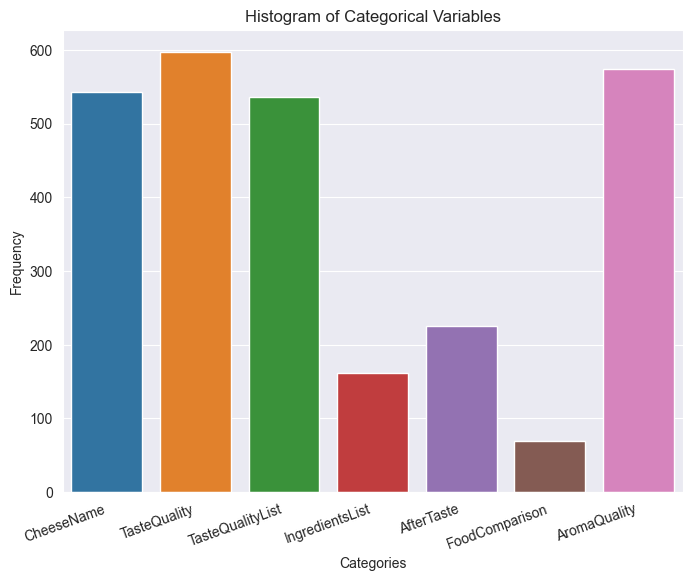

In [69]:
plot_histogram(smell_taste_data)

# Service Suggestions

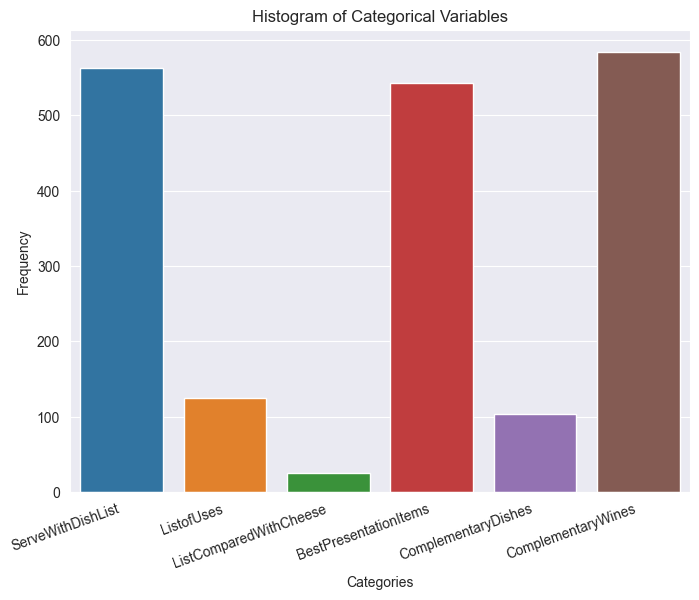

In [70]:
plot_histogram(service_data)

# Quality Assurance

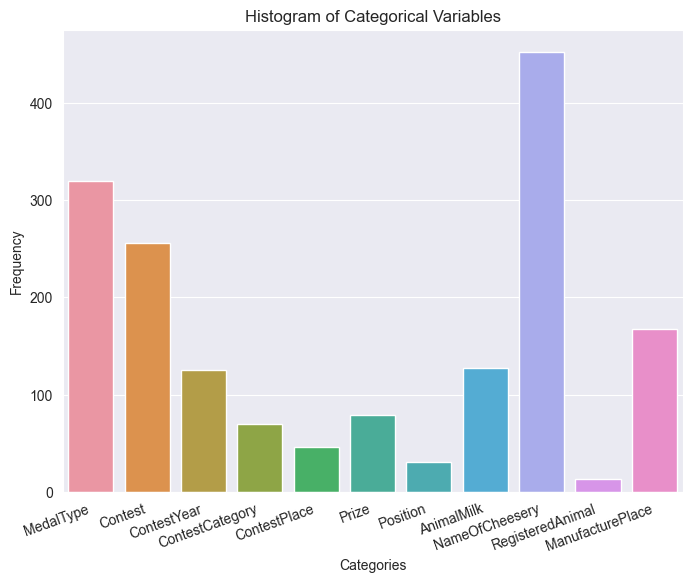

In [71]:
plot_histogram(qty_data)

# Data Cleaning

In [24]:
import json
import copy

rhet_dict = {
    "identification":{},
    "description":{},
    "process":{},
    "smell_taste":{},
    "service_suggestions":{},
    "quality_assurance":{}
}
rhet_list = [k for k,_ in rhet_dict.items()]

data_path = "../data/slots_data/rhet_data_slots.json"
data_write_path = "../data/slots_data/rhet_data_slots_cleaned.json"

with open(data_path, 'r') as f, open(data_write_path, 'w') as f1:
    records = json.load(f)
    files = list(records.keys())
    file_0 = files[0]
    ident_keys = records[file_0]['identification']['slots'].keys()
    desc_keys = records[file_0]['description']['slots'].keys()
    proc_keys = records[file_0]['process']['slots'].keys()
    smell_taste_keys = records[file_0]['smell_taste']['slots'].keys()
    service_sugg_keys = records[file_0]['service_suggestions']['slots'].keys()
    qty_assur_keys = records[file_0]['quality_assurance']['slots'].keys()
    
    # innitialize dict keys
    rhet_dict["identification"] = {k.split(" ")[0]:0 for k in ident_keys}
    rhet_dict["description"] = {k.split(" ")[0]:0 for k in desc_keys}
    rhet_dict["process"] = {k.split(" ")[0]:0 for k in proc_keys}
    rhet_dict["smell_taste"] = {k.split(" ")[0]:0 for k in smell_taste_keys}
    rhet_dict["service_suggestions"] = {k.split(" ")[0]:0 for k in service_sugg_keys}
    rhet_dict["quality_assurance"] = {k.split(" ")[0]:0 for k in qty_assur_keys}
    
    for file in files:
        record = records[file]
        for rhet in rhet_list:
            slot = record[rhet]['slots']
            slot_copy = copy.deepcopy(slot)
            for slot_name, slot_value in slot.items():
                # check if slot_vlaue is none or contains value
                slot_name_ = slot_name.split(" ")[0]
                if slot_name_ not in rhet_dict[rhet]:
                    # delete the slot
                    del slot_copy[slot_name]
                elif slot_name_ != slot_name:
                    slot_copy[slot_name_] = slot_value
                    del slot_copy[slot_name]

            record[rhet]['slots'] = slot_copy
        
        records[file] = record
    # write cleaned records
    json.dump(records, f1)

# Total Cleaned and Uncleaned records

In [30]:
total_uncleaned = 0
with open(data_path, 'r') as f:
    json_obj = json.load(f)
    for file in json_obj:
        for rhet in json_obj[file]:
            total_uncleaned+=len(list(json_obj[file][rhet]['slots'].items()))
print('Total uncleaned records: ', total_uncleaned)

Total uncleaned records:  54660


In [31]:
total_cleaned = 0
with open(data_write_path, 'r') as f:
    json_obj = json.load(f)
    for file in json_obj:
        for rhet in json_obj[file]:
            total_cleaned+=len(list(json_obj[file][rhet]['slots'].items()))
print('Total cleaned records: ', total_cleaned)

Total cleaned records:  54482


In [32]:
assert error_records+total_cleaned== total_uncleaned, "Error in data cleaning, total records dont match"

## Note: While Creating the DataSet class ignore tasks that have no slot values or an empty dictionary as a result of cleaning. These are the error records in the dataset